# QUANTIUM DATA ANALYTICS VIRTUAL EXPERIENCE PROGRAM

In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date
import re
import matplotlib.style as style
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/quantium-task2/QVI_data.csv
/kaggle/input/quantium-task2/Combined-data.csv


In [2]:
# Read data prepared in Task 1
data= pd.read_csv('/kaggle/input/quantium-task2/Combined-data.csv', parse_dates=['DATE'], index_col=0)

In [3]:
data.shape

(74570, 13)

In [4]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DAY,PROD_WEIGHT,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,149,149176,148841,16,Smiths Crinkle Chips Salt & Vinegar,2,11.4,Sunday,330.0,Smiths,OLDER SINGLES/COUPLES,Premium
1,2018-07-01,176,176365,177355,90,Tostitos Smoked Chipotle,2,8.8,Sunday,175.0,Tostitos,YOUNG SINGLES/COUPLES,Mainstream
2,2018-07-01,155,155043,155282,21,WW Sour Cream &OnionStacked Chips,2,3.8,Sunday,160.0,WW,MIDAGE SINGLES/COUPLES,Premium
3,2018-07-01,108,108339,110148,30,Doritos Corn Chips Cheese Supreme,2,8.8,Sunday,170.0,Doritos,NEW FAMILIES,Mainstream
4,2018-07-01,54,54021,47840,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,Sunday,380.0,Smiths,RETIREES,Mainstream


In [5]:
#Create new column with Month and Year
data['MONTH_YR']= data['DATE'].dt.strftime('%B-%Y')

Create a new dataframe having data of individual stores:

In [6]:
store_data = pd.DataFrame(columns=['STORE_NBR','MONTH_YR','TOT_SALES','CUST_NBR'])

In [7]:
store_data['STORE_NBR']=data['STORE_NBR'].unique().repeat(12)

In [8]:
store_data['MONTH_YR']=np.tile(data['MONTH_YR'].unique(),len (data['STORE_NBR'].unique()))
store_data ['MONTH']= store_data['MONTH_YR'].map(lambda x: datetime.datetime.strptime(x.split('-', 1)[0], "%B").month )
store_data['YEAR']=store_data['MONTH_YR'].map(lambda x: int(x.split('-', 1)[1]))

In [9]:
store_data.head()

,STORE_NBR,MONTH_YR,TOT_SALES,CUST_NBR,MONTH,YEAR
0,149,July-2018,NaN,NaN,7,2018
1,149,August-2018,NaN,NaN,8,2018
2,149,September-2018,NaN,NaN,9,2018
3,149,October-2018,NaN,NaN,10,2018
4,149,November-2018,NaN,NaN,11,2018


In [10]:
df =pd.Series(dtype=float)
for x in data.STORE_NBR.unique():
    for m in data['MONTH_YR'].unique():
        df = df.append( pd.Series(data[(data.STORE_NBR== x) & (data.MONTH_YR == m)]['TOT_SALES'].sum()), ignore_index=True)

In [11]:
store_data['TOT_SALES']=df

In [12]:
df =pd.Series(dtype=float)
for x in data.STORE_NBR.unique():
    for m in data['MONTH_YR'].unique():
        df = df.append( pd.Series(len(data[(data.STORE_NBR == x) & (data.MONTH_YR == m)]['LYLTY_CARD_NBR'].unique())), ignore_index=True)

In [13]:
store_data['CUST_NBR']=df

In [14]:
df =pd.Series(dtype=float)
for x in data.STORE_NBR.unique():
    for m in data['MONTH_YR'].unique():
        df = df.append( pd.Series(data[(data.STORE_NBR ==x) & (data.MONTH_YR ==m)]['TXN_ID'].value_counts().sum()), ignore_index=True)

In [15]:
store_data['TXN_COUNT']=df

1. **STORE_NBR:** Store number
2. **MONTH_YR:** Month-Year
3. **TOT_SALES:** Total sales for that month
4. **CUST_NBR:** Number of customers that month
5. **MONTH:** Month number
6. **YEAR:** Year
7. **TXN_COUNT:** Number of transactions that month

In [16]:
store_data.head()

,STORE_NBR,MONTH_YR,TOT_SALES,CUST_NBR,MONTH,YEAR,TXN_COUNT
0,149,July-2018,126.0,14,7,2018,14
1,149,August-2018,92.3,12,8,2018,12
2,149,September-2018,111.3,13,9,2018,14
3,149,October-2018,80.2,10,10,2018,10
4,149,November-2018,95.8,12,11,2018,12


In [17]:
# Check for nulls
store_data.isna().sum().sum()

0

Create a new dataframe having data of stores in the pre-trial period (before February 2019):

In [18]:
ptstore_data = store_data[(store_data.YEAR == 2018) | ((store_data.MONTH <2) & (store_data.YEAR == 2019))]

Divide the pre-trial dataframe into control stores dataframe and trial stores dataframe

In [19]:
# Control stores
cs_data = pd.DataFrame()
cs_data['TOT_SALES'] = ptstore_data[(ptstore_data.STORE_NBR != 77 ) & (ptstore_data.STORE_NBR != 86) & (ptstore_data.STORE_NBR != 88)]['TOT_SALES'].groupby(ptstore_data['STORE_NBR']).sum()
cs_data['CUST_NBR'] = ptstore_data[(ptstore_data.STORE_NBR != 77 ) & (ptstore_data.STORE_NBR != 86) & (ptstore_data.STORE_NBR != 88)]['CUST_NBR'].groupby(ptstore_data['STORE_NBR']).sum()
cs_data['TXN_COUNT'] = ptstore_data[(ptstore_data.STORE_NBR != 77 ) & (ptstore_data.STORE_NBR != 86) & (ptstore_data.STORE_NBR != 88)]['TXN_COUNT'].groupby(ptstore_data['STORE_NBR']).sum()

In [20]:
cs_data

,TOT_SALES,CUST_NBR,TXN_COUNT
STORE_NBR,,,
1,408.5,103,104
2,328.8,85,88
3,1825.0,216,227
4,2490.3,290,303
5,1581.2,219,236
...,...,...,...
268,485.5,105,108
269,1822.4,246,270
270,1876.7,255,288


In [21]:
# Trial stores
ts_data = pd.DataFrame()
ts_data['TOT_SALES'] = ptstore_data['TOT_SALES'].groupby(ptstore_data['STORE_NBR']).sum()
ts_data['CUST_NBR'] = ptstore_data['CUST_NBR'].groupby(ptstore_data['STORE_NBR']).sum()
ts_data['TXN_COUNT'] = ptstore_data['TXN_COUNT'].groupby(ptstore_data['STORE_NBR']).sum()
ts_data = ts_data.loc[[77,86,88]]

In [22]:
ts_data

,TOT_SALES,CUST_NBR,TXN_COUNT
STORE_NBR,,,
77,494.0,93,95
86,1762.1,256,275
88,2350.8,276,290


Find correlated stores:

In [23]:
# Highly correlated control stores with trial store 77
cs_data.corrwith(ts_data.loc[77], axis=1).nlargest(5)

STORE_NBR
50     1.0
238    1.0
36     1.0
90     1.0
181    1.0
dtype: float64

In [24]:
# difference between trial store's performance and each control store's performance
test = cs_data.loc[cs_data.corrwith(ts_data.loc[77], axis=1).nlargest(5).index]
(ts_data.loc[77] - test).sort_values(by = ['TOT_SALES'])

,TOT_SALES,CUST_NBR,TXN_COUNT
STORE_NBR,,,
181,-1627.4,-162.0,-169.0
238,-1580.6,-156.0,-163.0
36,-1120.5,-100.0,-105.0
50,-6.9,-9.0,-9.0
90,16.8,5.0,5.0


The least difference is with store 38 so it can be the control store for store 77.

In [25]:
# Highly correlated control stores with trial store 86
cs_data.corrwith(ts_data.loc[86], axis=1).nlargest(5)

STORE_NBR
33     1.0
180    1.0
208    1.0
13     1.0
5      1.0
dtype: float64

In [26]:
# difference between trial store's performance and each control store's performance
test = cs_data.loc[cs_data.corrwith(ts_data.loc[86], axis=1).nlargest(5).index]
(ts_data.loc[86] - test).sort_values(by = ['TOT_SALES'])

,TOT_SALES,CUST_NBR,TXN_COUNT
STORE_NBR,,,
180,19.4,8.0,8.0
33,22.9,17.0,17.0
13,179.0,35.0,37.0
5,180.9,37.0,39.0
208,389.0,60.0,64.0


The least difference is with store 105 so it can be the control store for store 86.

In [27]:
# Highly correlated control stores with trial store 88
cs_data.corrwith(ts_data.loc[88], axis=1).nlargest(10)

STORE_NBR
205    1.0
18     1.0
131    1.0
65     1.0
3      1.0
103    1.0
165    1.0
119    1.0
175    1.0
237    1.0
dtype: float64

In [28]:
# difference between trial store's performance and each control store's performance
test = cs_data.loc[cs_data.corrwith(ts_data.loc[88], axis=1).nlargest(6).index]
(ts_data.loc[88] - test).sort_values(by = ['TOT_SALES'])

,TOT_SALES,CUST_NBR,TXN_COUNT
STORE_NBR,,,
65,517.0,58.0,61.0
3,525.8,60.0,63.0
103,1787.6,170.0,181.0
18,1807.8,177.0,188.0
205,1815.4,185.0,196.0
131,1958.1,178.0,190.0


The least difference is with store 130 so it can be the control store for store 88.

In [29]:
# Create dataframes for the store pairs
pf1 = pd.concat([cs_data[cs_data.index == 38],ts_data[ts_data.index == 77]])
pf2 = pd.concat([cs_data[cs_data.index == 105],ts_data[ts_data.index == 86]])
pf3 = pd.concat([cs_data[cs_data.index == 130],ts_data[ts_data.index == 88]])

In [30]:
style.use('seaborn-poster')
sns.set_style('darkgrid')

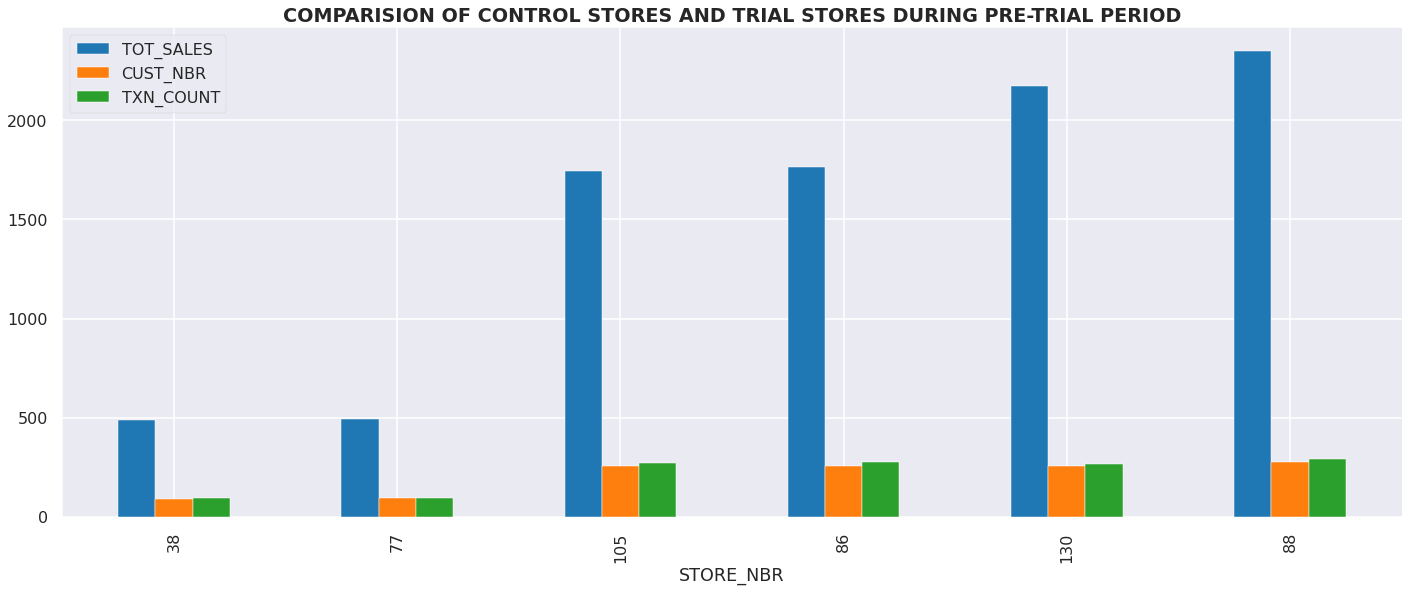

In [31]:
# Visualise the performance of trial stores and the control stores during pre-trial period
plt.rcParams['figure.figsize'] = (24, 9)
df = pd.concat([pf1,pf2,pf3])
df.plot(kind='bar', width=0.5)
plt.title('COMPARISION OF CONTROL STORES AND TRIAL STORES DURING PRE-TRIAL PERIOD',fontweight='bold')
plt.show()

Create a new dataframe having data of stores in the trial period (February 2019 - April 2019):

In [32]:
t_data = store_data[((store_data.MONTH >1)&(store_data.YEAR == 2019)) & ((store_data.MONTH <5)&(store_data.YEAR == 2019))]

In [33]:
trial_data = pd.DataFrame()
trial_data['TOT_SALES'] = t_data['TOT_SALES'].groupby(t_data['STORE_NBR']).sum()
trial_data['CUST_NBR'] = t_data['CUST_NBR'].groupby(t_data['STORE_NBR']).sum()
trial_data['TXN_COUNT'] = t_data['TXN_COUNT'].groupby(t_data['STORE_NBR']).sum()

In [34]:
# Create dataframes for the store pairs
pf1 = trial_data.loc[[38,77]]
pf2 = trial_data.loc[[105,86]]
pf3 = trial_data.loc[[130,88]]

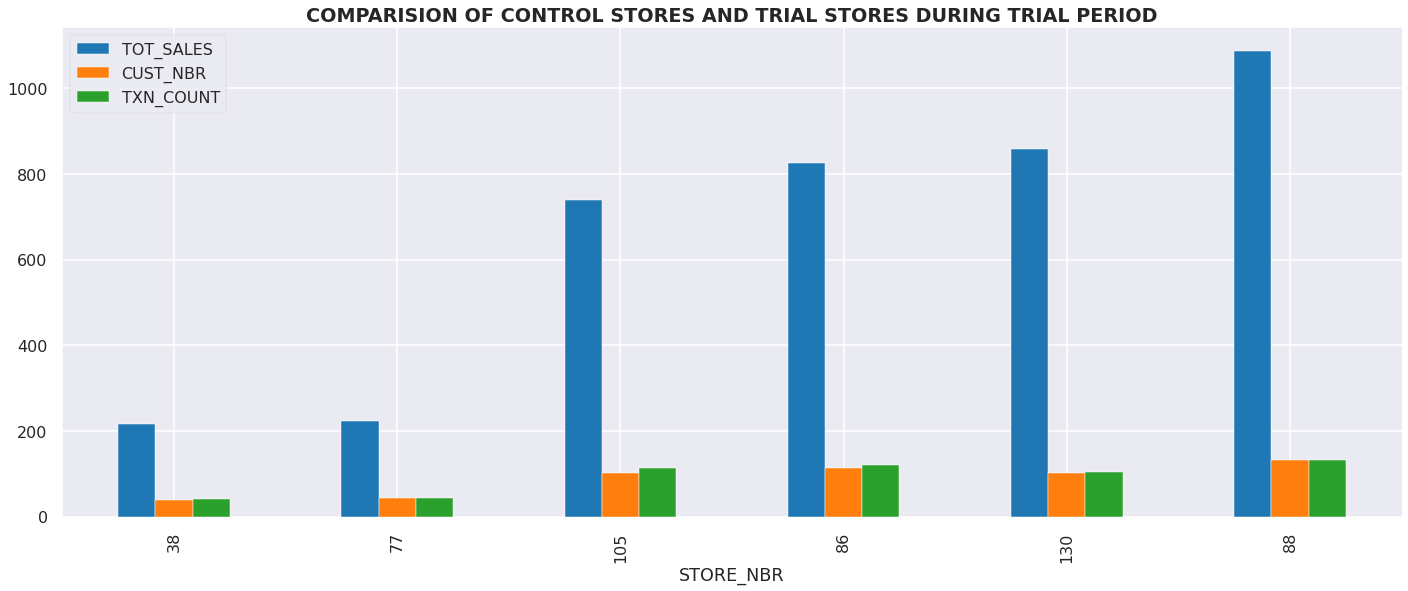

In [35]:
# Visualise the performance of trial stores and the control stores during trial period
plt.rcParams['figure.figsize'] = (24, 9)
df = pd.concat([pf1,pf2,pf3])
df.plot(kind='bar', width=0.5)
plt.title('COMPARISION OF CONTROL STORES AND TRIAL STORES DURING TRIAL PERIOD',fontweight='bold')
plt.show()

# CONCLUSION:

(Trial Store-Control Store)

77-38

86-105

88-30

* The results for trial stores **86** and **88** during the trial period show a **significant** difference in terms of total sales, customer number and number of transactions but this is not the case for trial store 77.

* It might be that the way of implementation of the trial was different in trial store **77**.

* Maximum difference of total sales is recorded from trial store **88**, which means that it carried out the **best implementation** of the trial.

